In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

pd.set_option('display.max_rows', 500)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

# Блок функций

In [245]:
# функция для построения корреляционной таблицы


def correlations(dataset):
    matrix = dataset.corr()
    display(sns.heatmap(matrix, annot=True))

# функция для построения боксплотов для номинативных переменных


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud_nominative.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index)],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

# функция для теста Стьюдента


def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

# Блок анализа

In [246]:
# Первым делом посмотрим всю таблицу целиком, благо размер позволяет.

stud

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [247]:
# Сразу можно заметить, что столбец studytime, granular имеет почти абсолютную корелляцию со столбцом stuytime. Его можно удалить.
stud.drop(['studytime, granular'], inplace=True, axis=1)

# Остальные столбцы приводим к общему формату
stud.rename(columns={'Pstatus': 'pstatus',
                     'Medu': 'medu',
                     'Fedu': 'fedu',
                     'Mjob': 'mjob',
                     'Fjob': 'fjob',
                     }, inplace=True)

In [248]:
# Выведем обзор данных

stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

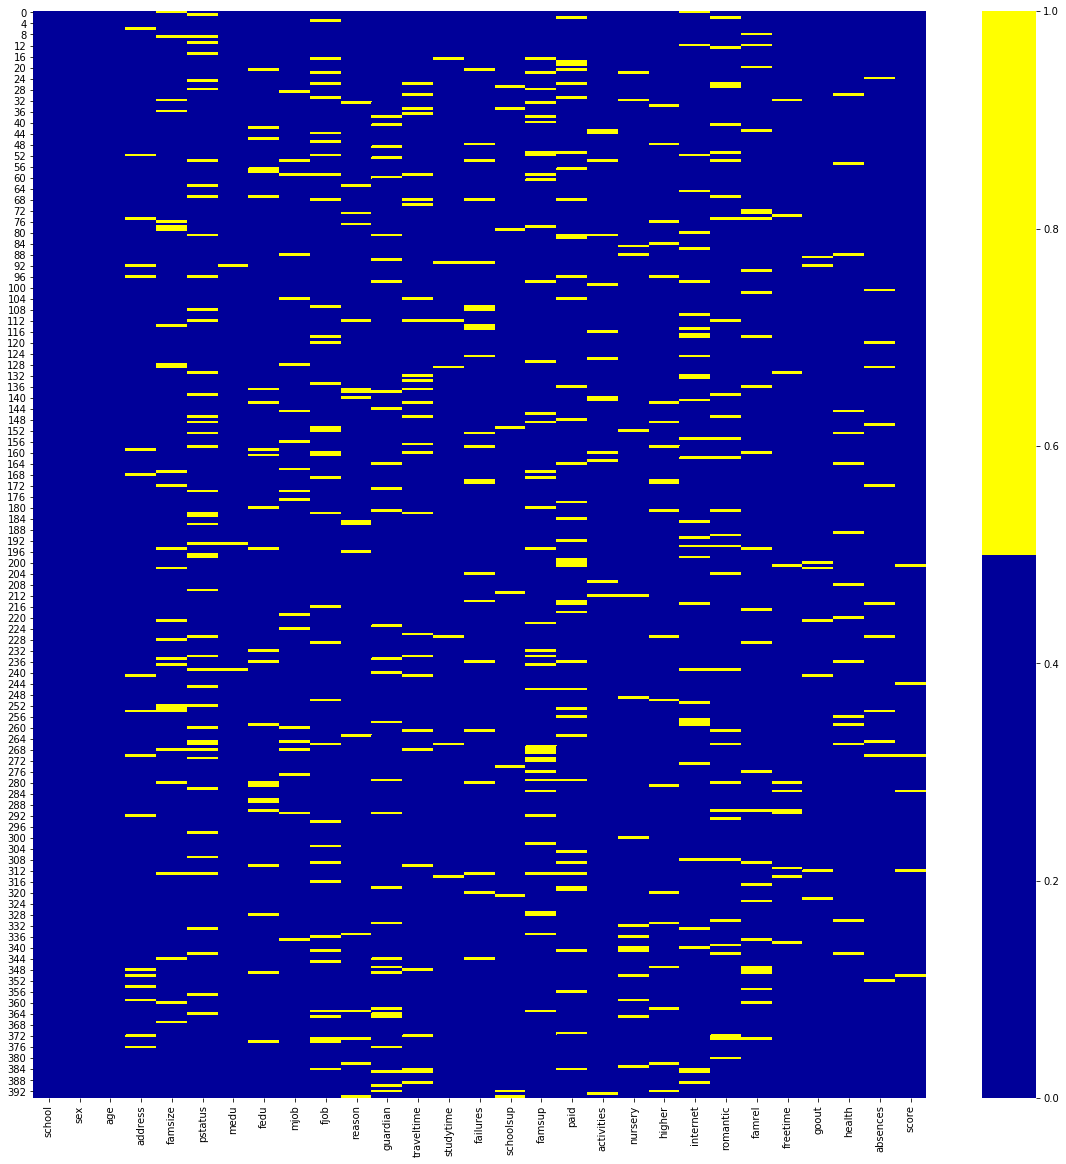

In [249]:
# Видно, что в датасете есть пропущенные данные. Визуально оценим их количество с помощью тепловой карты.
fig, axes = plt.subplots(figsize=(20, 20))
cols = stud.columns  # первые 30 колонок
# определяем цвета
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00']
sns.heatmap(stud[cols].isnull(), cmap=sns.color_palette(colours))

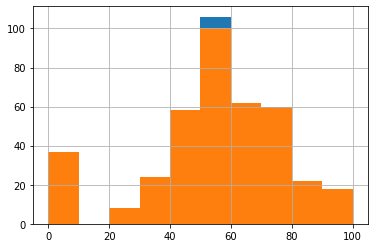

In [250]:
# Для каждого столбца вручную выбираем метод заполнения NaN. Чтобы оценить влияние каждого метода,
# используем комбинированную гистограмму, показывающую разницу между распределением "до" и "после". После этого разрабатываем функцию.

stud_test = stud['score']
stud_test_filled = stud_test.fillna(stud_test.mode()[0])
display(stud_test_filled.hist())
display(stud_test.hist())

# Итоговый вывод - можно заполнить все значения модой. Грубый способ, но это не окажет существенного влияния на итоговые выводы.
# К сожалению, заканчивал проект поздно и не остается времени на более изысканный метод.

In [251]:
# Заменяем все NaN модой и воводим количество замененных значений для каждого столбца

for col in stud.columns:
    nans_count = stud[col].isnull().sum()
    stud[col] = stud[col].fillna(stud[col].mode()[0])
    print('Обнаружено и удалено {}'.format(nans_count),
          'нулевых значений в столбце {}'.format(col))

Обнаружено и удалено 0 нулевых значений в столбце school
Обнаружено и удалено 0 нулевых значений в столбце sex
Обнаружено и удалено 0 нулевых значений в столбце age
Обнаружено и удалено 17 нулевых значений в столбце address
Обнаружено и удалено 27 нулевых значений в столбце famsize
Обнаружено и удалено 45 нулевых значений в столбце pstatus
Обнаружено и удалено 3 нулевых значений в столбце medu
Обнаружено и удалено 24 нулевых значений в столбце fedu
Обнаружено и удалено 19 нулевых значений в столбце mjob
Обнаружено и удалено 36 нулевых значений в столбце fjob
Обнаружено и удалено 17 нулевых значений в столбце reason
Обнаружено и удалено 31 нулевых значений в столбце guardian
Обнаружено и удалено 28 нулевых значений в столбце traveltime
Обнаружено и удалено 7 нулевых значений в столбце studytime
Обнаружено и удалено 22 нулевых значений в столбце failures
Обнаружено и удалено 9 нулевых значений в столбце schoolsup
Обнаружено и удалено 39 нулевых значений в столбце famsup
Обнаружено и удал

In [252]:
stud

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,GT3,T,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [253]:
# Убеждаемся, что нулевые значения исчезли

stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   pstatus     395 non-null    object 
 6   medu        395 non-null    float64
 7   fedu        395 non-null    float64
 8   mjob        395 non-null    object 
 9   fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    float64
 13  studytime   395 non-null    float64
 14  failures    395 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

Text(0.5, 1.0, 'Баллы по госэкзамену по математике (score)')

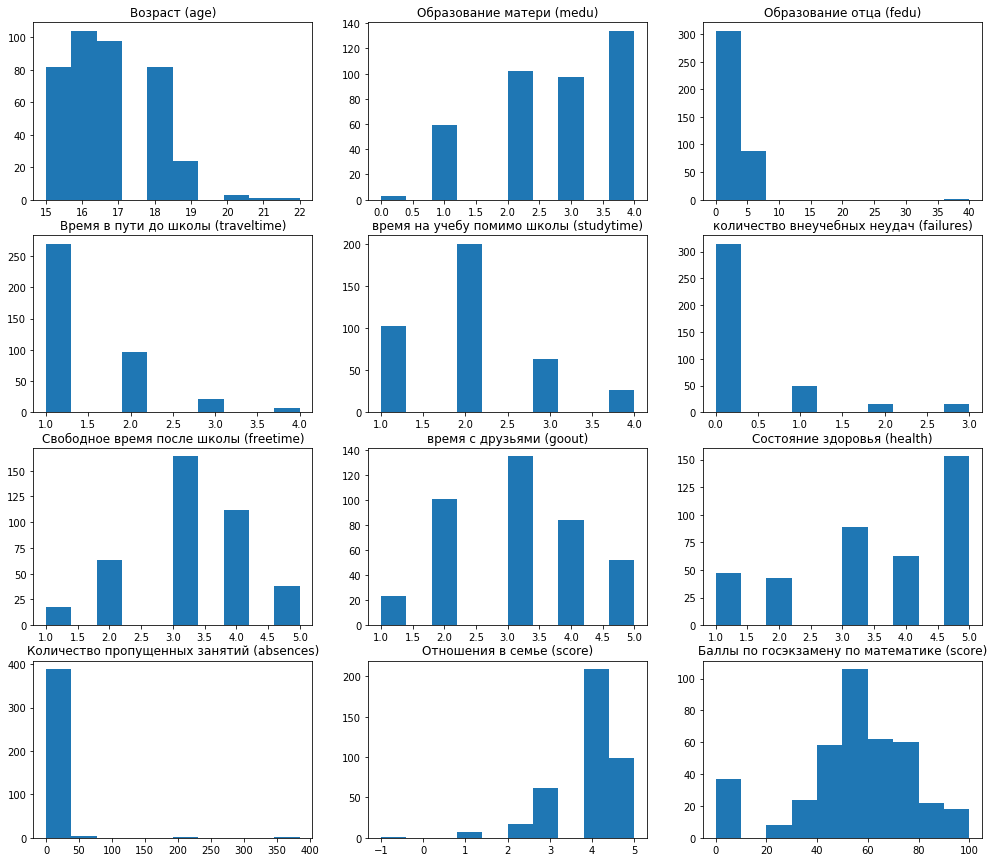

In [254]:
# Cмотрим на распределения числовых признаков. Для лучшего понимания, выведем их рядами.

fig, axes = plt.subplots(4, 3, figsize=(17, 15))

axes[0][0].hist(stud['age'])
axes[0][0].set_title('Возраст (age)')

axes[0][1].hist(stud['medu'])
axes[0][1].set_title('Образование матери (medu)')

axes[0][2].hist(stud['fedu'])
axes[0][2].set_title('Образование отца (fedu)')

axes[1][0].hist(stud['traveltime'])
axes[1][0].set_title('Время в пути до школы (traveltime)')

axes[1][1].hist(stud['studytime'])
axes[1][1].set_title('время на учебу помимо школы (studytime)')

axes[1][2].hist(stud['failures'])
axes[1][2].set_title('количество внеучебных неудач (failures)')

axes[2][0].hist(stud['freetime'])
axes[2][0].set_title('Свободное время после школы (freetime)')

axes[2][1].hist(stud['goout'])
axes[2][1].set_title('время с друзьями (goout)')

axes[2][2].hist(stud['health'])
axes[2][2].set_title('Состояние здоровья (health)')

axes[3][0].hist(stud['absences'])
axes[3][0].set_title('Количество пропущенных занятий (absences)')

axes[3][1].hist(stud['famrel'])
axes[3][1].set_title('Отношения в семье (score)')

axes[3][2].hist(stud['score'])
axes[3][2].set_title('Баллы по госэкзамену по математике (score)')

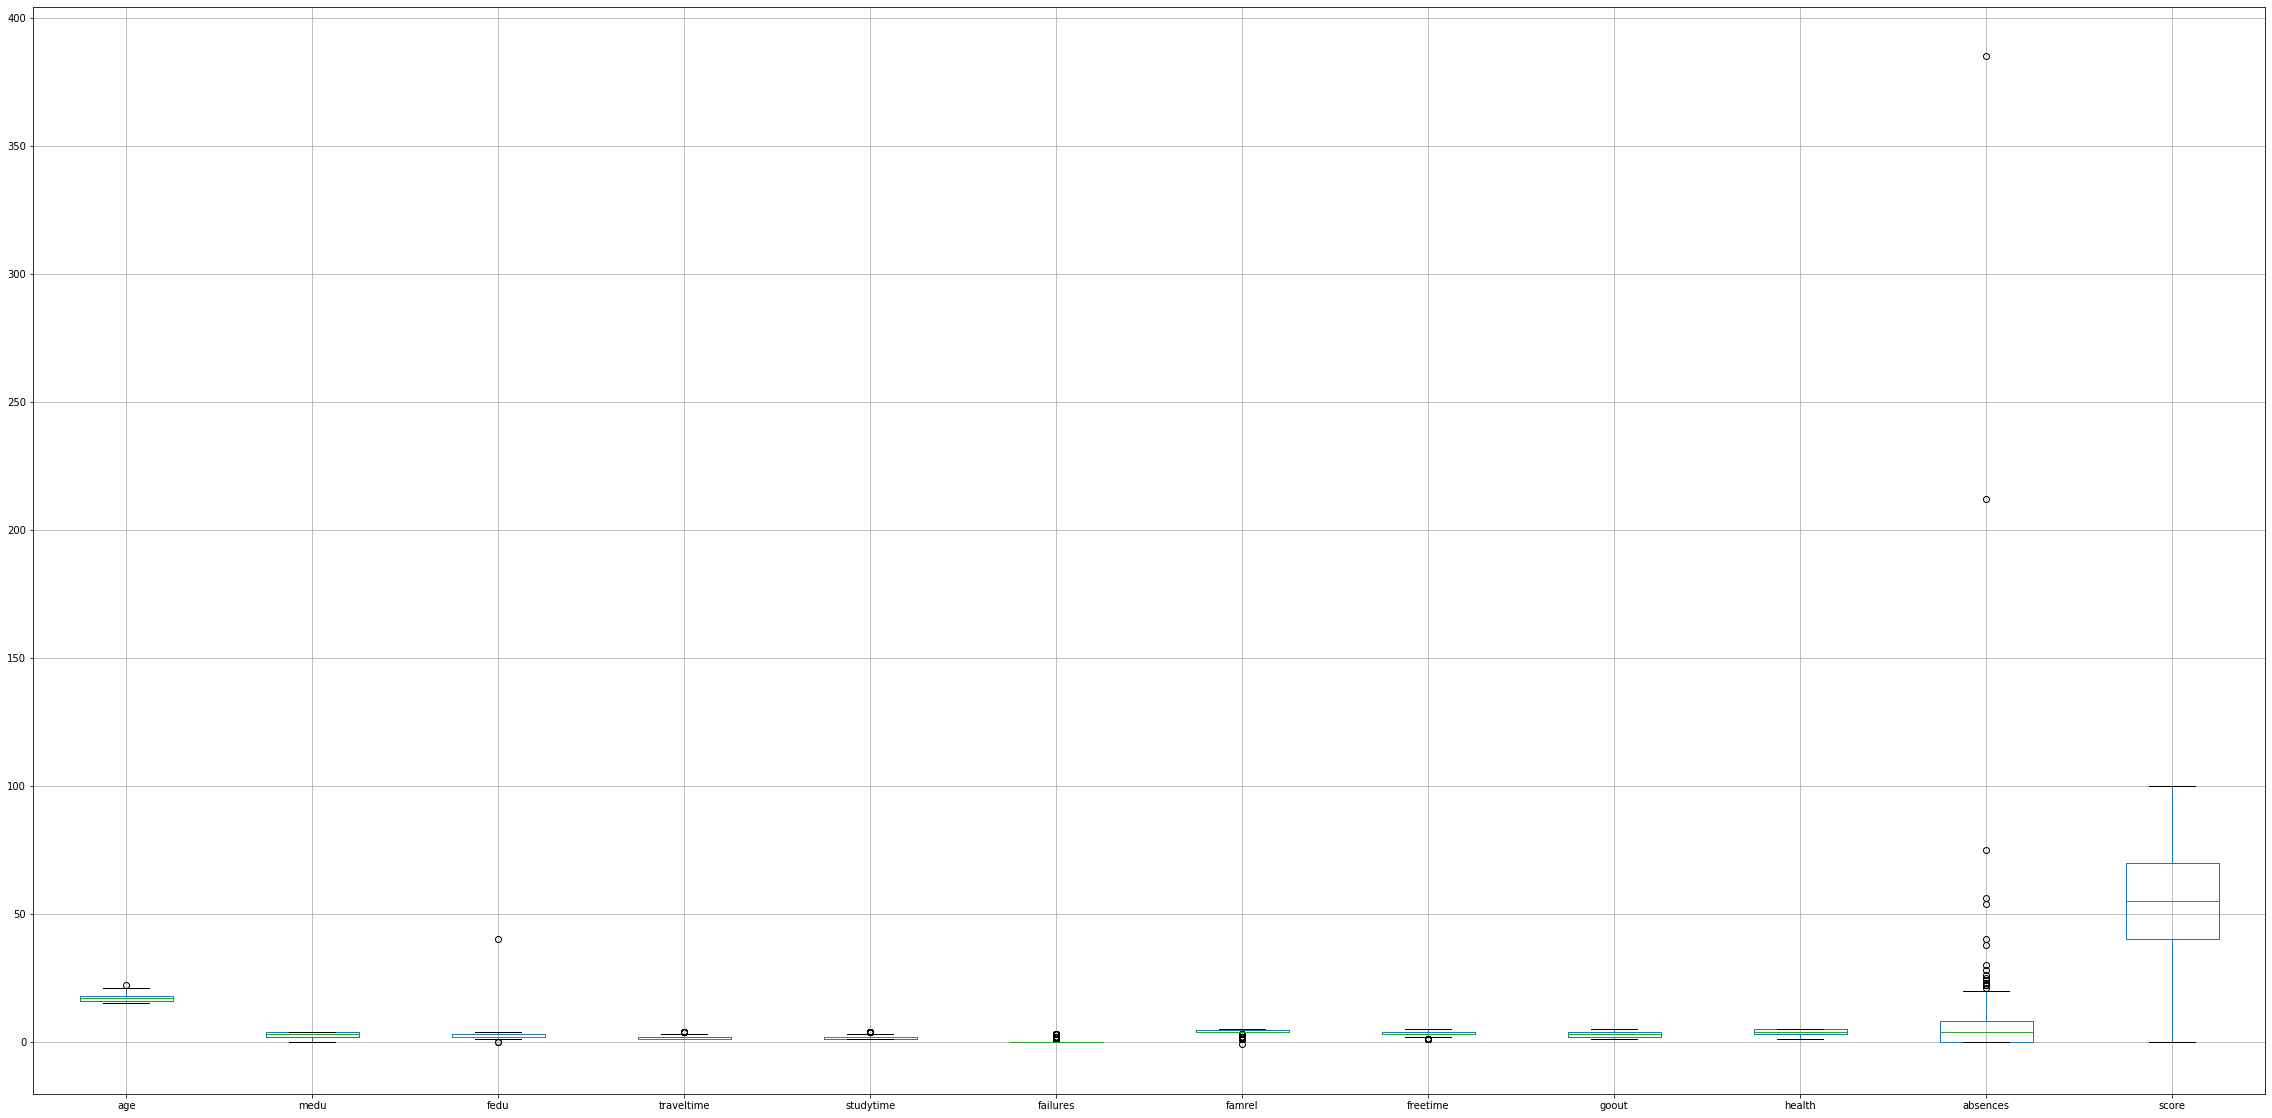

In [255]:
# Гистограмы выше показывают, что в столбцах absences и fedu есть очевидные выбросы. Однако, могут быть и неочевидные.
# Посмотрим на данные при помощи boxplot.

fig, axes = plt.subplots(figsize=(40, 20))
stud.boxplot()

# В Absence выброс такой, что даже не удается рассмотреть боксы. Кто-то совсем не ходит в школу.
# Ради интереса выведем профили самых дерзких прогульщиков.

In [256]:
display(stud['absences'].describe())
display(stud[stud.absences > 40])

count    395.000000
mean       7.058228
std       23.138935
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,3.0,5.0,54.0,55.0
183,GP,F,17,U,LE3,T,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,yes,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,yes,no,no,no,no,yes,yes,4.0,1.0,1.0,5.0,75.0,45.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,mother,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


In [257]:
# Что интересного можно заметить:
# 1.Есть студентка, у которой количество пропущенных занятий больше, чем дней в году. Это явно ошибка.

# 2.В основном прогульщики женского пола.

# 3.У всех ребят в выборке опекун - мать.

# Но вернемся обратно к EDA

In [258]:
# Подсчитаем количетсво выбросов в числовых столбцах

for col in stud.columns:
    if stud[col].dtype != 'O':
        counter = 0
        Q1 = stud[col].quantile(0.25)
        Q3 = stud[col].quantile(0.75)
        IQR = Q3 - Q1
        for string in stud[col]:
            if (string < (Q1 - 1.5 * IQR) or string > (Q3 + 1.5 * IQR)):
                counter += 1
        print('количество выбросов в столбце {}'.format(col), '-', counter)

# Есть очевидные выбросы в столбцах с количественными признаками, но на счет качественных есть сомнения.
# Эти две группы признаков явно требуют разных подходов

количество выбросов в столбце age - 1
количество выбросов в столбце medu - 0
количество выбросов в столбце fedu - 3
количество выбросов в столбце traveltime - 7
количество выбросов в столбце studytime - 27
количество выбросов в столбце failures - 80
количество выбросов в столбце famrel - 87
количество выбросов в столбце freetime - 18
количество выбросов в столбце goout - 0
количество выбросов в столбце health - 0
количество выбросов в столбце absences - 17
количество выбросов в столбце score - 0


In [259]:
# Разделим числовые признаки исходного датафрейма на количественные, качественные и номинативные (последние понадобятся чуть позже).

qualitative = 'medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health'
quantitative = 'age,absences,score'
nominative = []
stud_qualitative = pd.DataFrame()
stud_quantitative = pd.DataFrame()
stud_nominative = pd.DataFrame()

for col in stud.columns:
    if col in qualitative:
        stud_qualitative[col] = stud[col]
    elif col in quantitative:
        stud_quantitative[col] = stud[col]
    else:
        stud_nominative[col] = stud[col]
        nominative.append(col)

In [260]:
# Поскольку качественные характеристики имеют четкий диапазон,
# нам достаточно проверить, что характеристики не выходят за рамки этого диапазона

display(stud_qualitative.max())
display(stud_qualitative.min())

medu           4.0
fedu          40.0
traveltime     4.0
studytime      4.0
failures       3.0
famrel         5.0
freetime       5.0
goout          5.0
health         5.0
dtype: float64

medu          0.0
fedu          0.0
traveltime    1.0
studytime     1.0
failures      0.0
famrel       -1.0
freetime      1.0
goout         1.0
health        1.0
dtype: float64

In [261]:
# в столбцах fedu и famrel есть значения, лежащие за пределом качественного диапазона.Скорее всего, это опечатки.
# Уберем у них лишние знаки в новом и оригинальном датасетах.

stud_qualitative['fedu'] = stud_qualitative['fedu'].replace(40, 4)
stud_qualitative['famrel'] = stud_qualitative['famrel'].replace(-1, 1)

stud['fedu'] = stud['fedu'].replace(40, 4)
stud['famrel'] = stud['famrel'].replace(-1, 1)

# Все, выбросы качественных признаков обработаны.Перейдем к количественным.

In [262]:
# Сразу обратим внимание на столбец Age, поскольку у него тоже есть четкий диапазон.

display(stud_quantitative['age'].max())
display(stud_quantitative['age'].min())

# здесь тоже все в порядке, по факту выбросов нет.

22

15

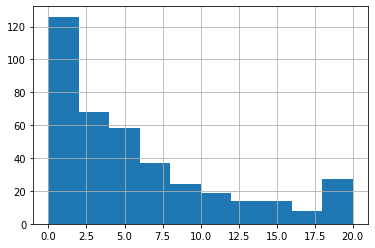

In [263]:
# Остается только проблемный столбец absences. В нем 17 выбросов, на мой взгляд, это слишком много, чтобы их удалять.
# Можно заменить их значением верхней границы, после которой начинаются выбросы (Q3 + 1.5 * IQR).
# Так мы покажем, что пропуски у этих учеников значительные, при этом устраним выбросы.
# Проверим, как изменяться данные в случае такой замены

Q1 = stud['absences'].quantile(0.25)
Q3 = stud['absences'].quantile(0.75)
IQR = Q3 - Q1
top_border = Q3 + 1.5 * IQR  # результат этой формулы равен 20

stud_test = stud['absences']
stud_test_filled = stud['absences'].apply(lambda x: 20 if x > 20 else x)
display(stud_test_filled.hist())

# Вполне приемлемо. Заменяем в основном датасете.

stud['absences'] = stud['absences'].apply(lambda x: 20 if x > 20 else x)

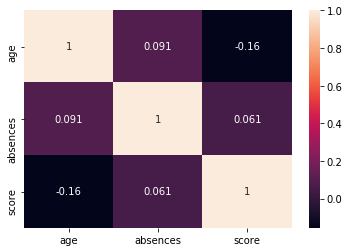

In [264]:
# Итак, данные приведены в "товарный" вид. Теперь можно заняться поисками корелляций.
# Начнем с количественных переменных

correlations(stud_quantitative)

In [265]:
# Выводы:

# 1.Слишком сильных корелляция нет, поэтому никакие переменные исключать не будем.

# 2.Статистика показывает, что у более старших учеников может немного снижаться оценка и расти количество пропусков.

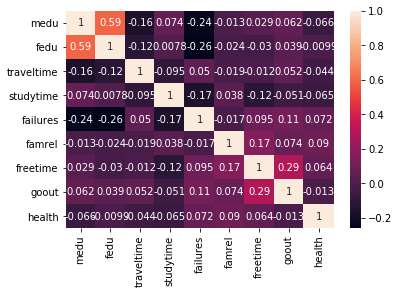

In [266]:
# Теперь посмотрим на качественные переменные.

correlations(stud_qualitative)

In [267]:
# Выводы:

# 1.Слишком сильных корелляция нет, поэтому никакие переменные исключать не будем.

# 2.Мать и отец, как правило, работают в одной сфере.

# 3.Свободное время после школы многие студенты любят проводить с друзьями. Вполне логично.

In [268]:
# Теперь перейдем к номинативным переменным. Оценим количество уникальных значений в них:

stud_nominative.nunique()

# Уникальных значений немного, можно не делать срез.

school        2
sex           2
address       2
famsize       2
pstatus       2
mjob          5
fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

In [269]:
# Попробуем применить к данным функцию для теста Стьюдента, описанную в задании про шоколадные батончики

for col in stud:
    if (col in qualitative) or (col in quantitative):
        continue
    else:
        get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


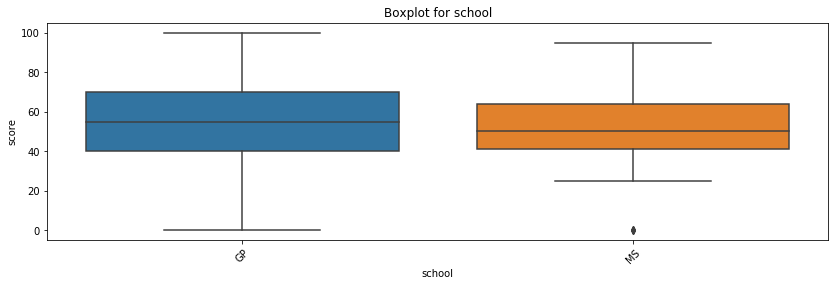

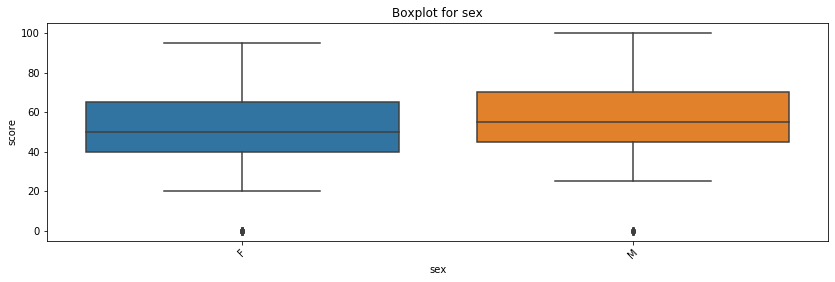

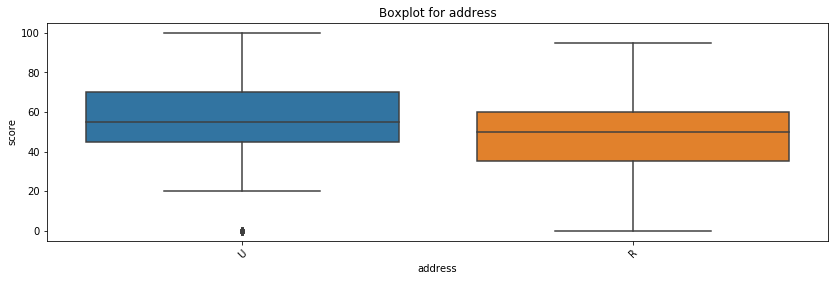

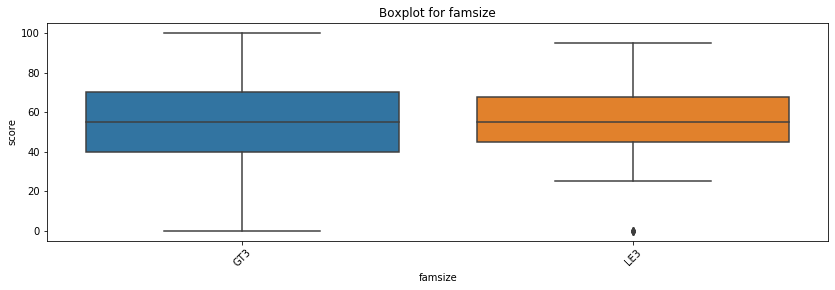

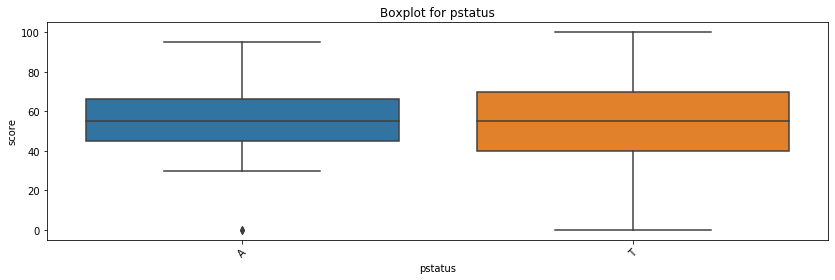

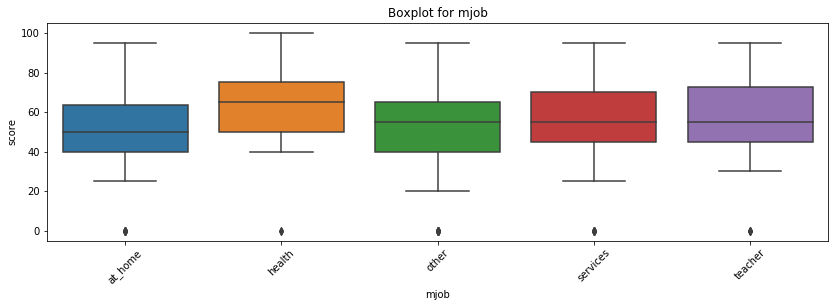

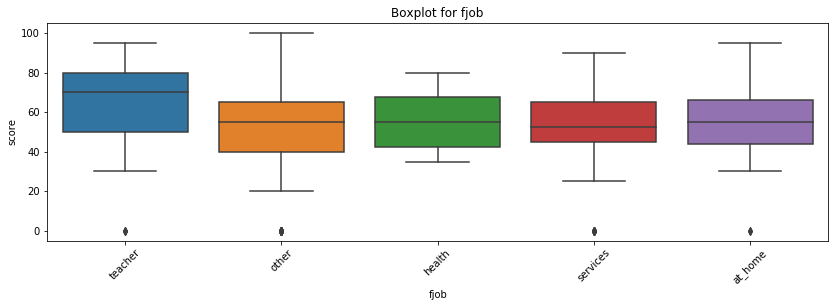

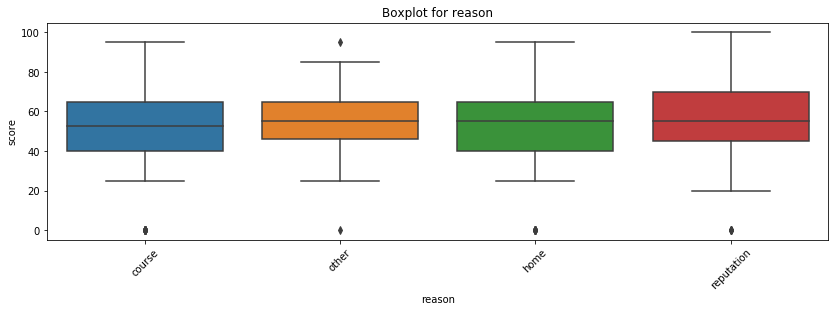

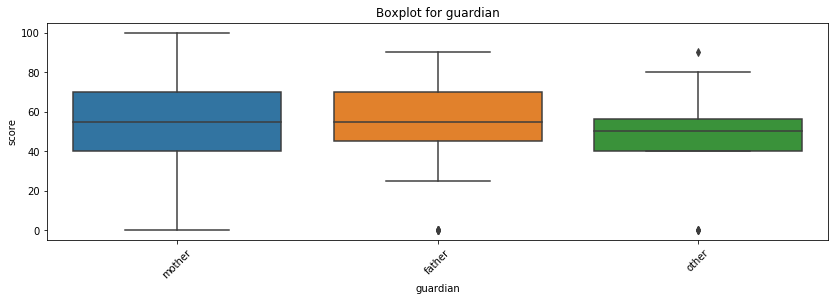

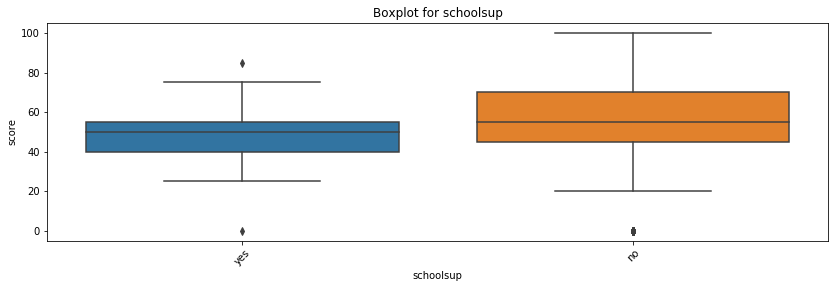

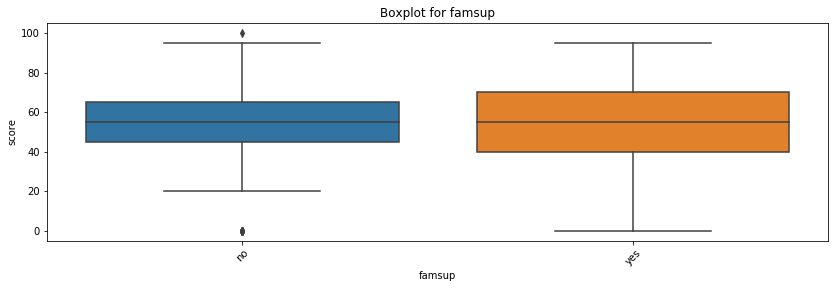

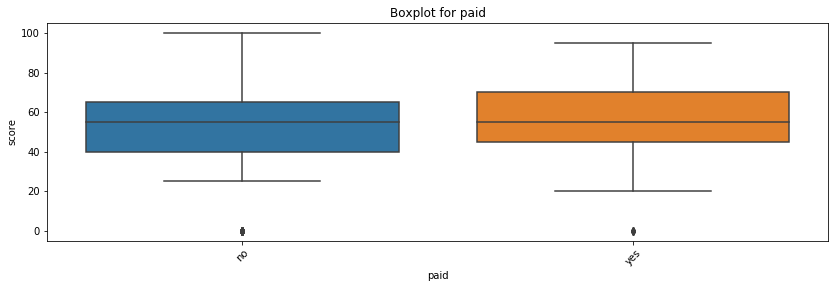

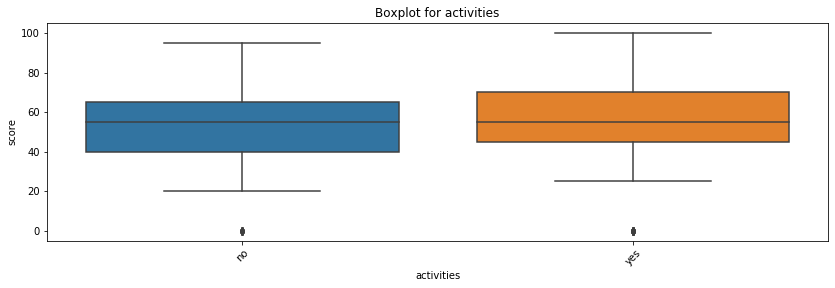

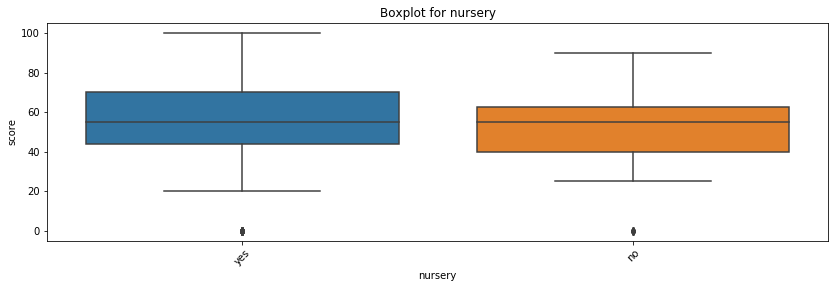

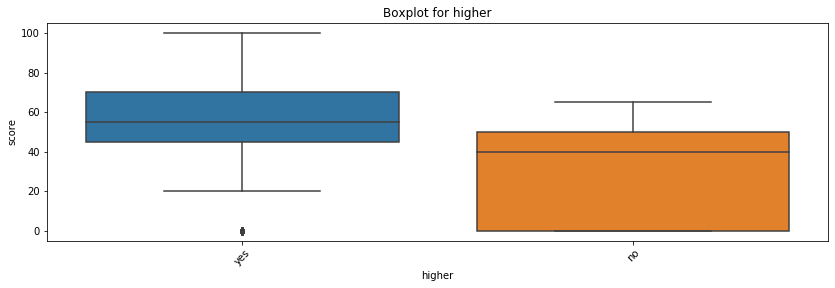

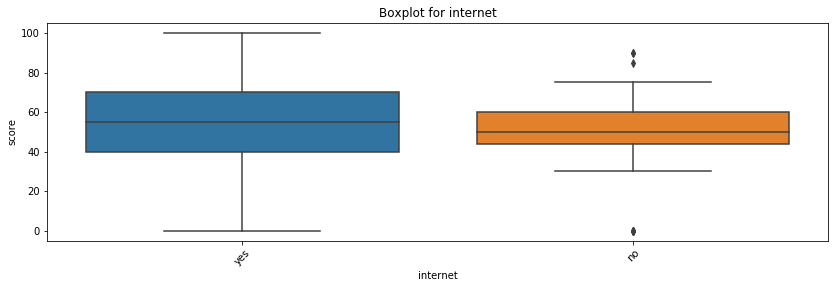

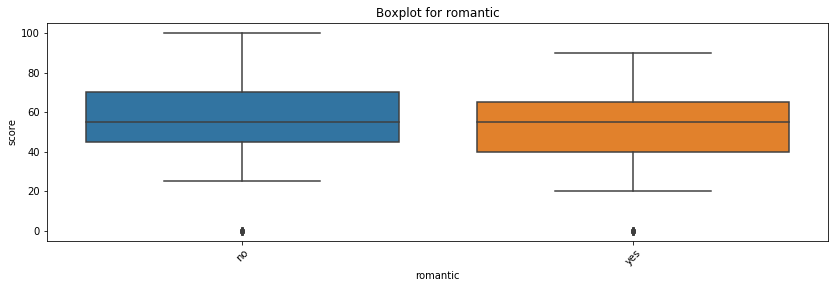

In [270]:
# А также построим боксплоты

for col in nominative:
    get_boxplot(col)

# Выводы, которые можно сформировать по итогам:

# 1. Колонки, которые точно нужно оставтить для анализа - sex,address,mjob,higher,romantic. К ним я бы добавил age и absences, schoolsup и nursery.
# 2. Качество данных на среднем уровне, есть пропуски и ошибочные значения.
# 3. Определение выбросов через IQR плохо работает для качественных значений.
# 4. Корелляции между столбцами слабые.
# 5. У более старших учеников может немного снижаться оценка и расти количество пропусков.